# <span style="color:blue">Week 4: NLP Disaster Tweets Kaggle Mini-Project</span>
## *(Introduction to Deep Learning)*
#### 🏫 University of Colorado, Boulder - Introduction to Deep Learning

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
# Table of contents
* [1. Task description](#section1)
    * [Instructions](#section1.1)
    * [Project's description](#section1.2)
* [2. Import and Data Loading](#section2)
    * [Import](#section2.1)
    * [Data Description](#section2.2)
* [3. Exploratory Data Analysis (EDA)](#section3)
* [4. Model Architecture](#section4)
* [5. Results and Analysis](#section5)
* [6. Conclusion](#section6)

-------------
# 1. Task description<a class="anchor" id="section1"></a>
---------------

## Instructions<a class="anchor" id="section1.1"></a>

For this week’s mini-project, you will participate in this 
Kaggle competition: Natural Language Processing with Disaster Tweets(https://www.kaggle.com/c/nlp-getting-started/overview).

This Kaggle competition is about classifying texts. It is an excellent introduction to Natural Language Processing (NLP). 

The project has 125 total points. The instructions summarize the criteria you will use to guide your submission and review others’ submissions. Note: to receive total points for this section, the learner doesn't need to have a top-performing score on the challenge. This is a mini-project to complete as a weekly assignment, so we don't expect you to iterate over your project until you have a model capable of winning the challenge. The learner needs to show a score that reasonably reflects that they completed the rubric parts of this project, E.g., a model score above 0.00000.  

You will submit three deliverables: 

1. **Deliverable 1** — A Jupyter notebook with a description of the problem/data, exploratory data analysis (EDA) procedure, analysis (model building and training), result, and discussion/conclusion. Suppose your work becomes so large that it doesn’t fit into one notebook (or you think it will be less readable by having one large notebook). In that case, you can make several notebooks or scripts in a GitHub repository (as deliverable 3) and submit a report-style notebook or pdf instead.If your project doesn’t fit into Jupyter notebook format (E.g., you built an app that uses ML), write your approach as a report and submit it in a pdf form. 

2. **Deliverable 2** — A public project GitHub repository with your work (please also include the GitHub repo URL in your notebook/report).

3. **Deliverable 3** — A screenshot of your position on the Kaggle competition leaderboard for your top-performing model.

### Review criteria

Three of your peers will review each of your three deliverables (Jupyter notebook or pdf report, GitHub repository, and challenge leaderboard screenshot) based on the rubrics for each deliverable.

Use the rubrics to guide your project to include all parts for the grade you want to achieve. The project has 125 total points.

### Peer Review

One of the essential components of this project is peer review. In this project, you gain hands-on experience on Kaggle, a famous platform for data science competitions. To further your professional development, think of your peers as work colleagues. Communicate how you approached this critical task! Organize and appropriately comment on your codebase so that your co-workers can collaborate on it and maintain it. What can you learn from how your peers approached this project? 

### Instructions: Step 1

**Brief description of the problem and data (5 pts)**

Briefly describe the challenge problem and NLP. Describe the size, dimension, structure, etc., of the data. 

### Instructions: Step 2
 
**Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data (15 pts)**

Show a few visualizations like histograms. Describe any data cleaning procedures. Based on your EDA, what is your plan of analysis? 

### Instructions: Step 3
 
**Model Architecture (25 pts)**

Describe your model architecture and reasoning for why you believe that specific architecture would be suitable for this problem. 

Since we did not learn NLP-specific techniques such as word embeddings in the lectures, we recommend looking at Kaggle tutorials, discussion boards, and code examples posted for this challenge.  You can use any resources needed, but make sure you “demonstrate” you understood by including explanations in your own words. Also importantly, please have a reference list at the end of the report.  

There are many methods to process texts to matrix form (word embedding), including TF-IDF, GloVe, Word2Vec, etc. Pick a strategy and process the raw texts to word embedding. Briefly explain the method(s) and how they work in your own words.

Build and train your sequential neural network model (You may use any RNN family neural network, including advanced architectures LSTM, GRU, bidirectional RNN, etc.). 

### Instructions: Step 4
 
**Results and Analysis (35 pts)**

Run hyperparameter tuning, try different architectures for comparison, apply techniques to improve training or performance, and discuss what helped.

Includes results with tables and figures. There is an analysis of why or why not something worked well, troubleshooting, and a hyperparameter optimization procedure summary.

### Instructions: Step 5
 
**Conclusion (15 pts)**

Discuss and interpret results as well as learnings and takeaways. What did and did not help improve the performance of your models? What improvements could you try in the future?

### Instructions: Step 6
 
**Produce Deliverables: High-Quality, Organized Jupyter Notebook Report, GitHub Repository, and screenshot of Kaggle leaderboard (30 points)**

These deliverables serve two purposes- grade for this course and your project portfolio that you can show when you apply for jobs.

If you haven’t used GitHub previously, please find a tutorial and get acquainted with it before the project deadline. For the sake of this project, you can use GitHub to showcase your codebase. In the real world, versioning with GitHub is vital for collaboration. Sometimes Jupyter notebooks don’t seem particularly well-suited to versioning with GitHub due to hard-to-read diffs and the like. If you want to use this project as an opportunity to practice versioning with GitHub, consider something like the following: https://www.reviewnb.com.

## Project's Description<a class="anchor" id="section1.2"></a>

### Description
Welcome to one of our "Getting Started" competitions 👋
This particular challenge is perfect for data scientists looking to get started with Natural Language Processing. The competition dataset is not too big, and even if you don’t have much personal computing power, you can do all of the work in our free, no-setup, Jupyter Notebooks environment called Kaggle Notebooks.

If you want to talk with other users about this competition, come join our Discord! We've got channels for competitions, job postings and career discussions, resources, and socializing with your fellow data scientists. Follow the link here: https://discord.gg/kaggle

In [12]:
#import libraries

import numpy as np 
import pandas as pd 
import cv2
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_recall_curve, auc
import tensorflow as tf
from transformers import AdamW
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from transformers import BertTokenizer
from transformers import BertForSequenceClassification
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import DistilBertForSequenceClassification
from pathlib import Path
import zipfile

-------------
# 2. Import and Data Loading<a class="anchor" id="section2"></a>
---------------

## Import<a class="anchor" id="section2.1"></a>

In [55]:
# Setup path to a data folder
data_path = Path("data")
csv_path = data_path / "nlp-getting-started"

# If the image folder doesn't exist, download it and prepare it
if csv_path.is_dir():
    print(f"{csv_path} directory already exists...")
else:
    print(f"{csv_path} does not exist, creating one...")
    csv_path.mkdir(parents=True, exist_ok=True)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "nlp-getting-started.zip", "r") as zip_ref:
    print("Unzipping nlp-getting-started data")
    zip_ref.extractall(csv_path)

data\nlp-getting-started directory already exists...
Unzipping nlp-getting-started data


In [56]:
def walk_through_dir(dir_path):
    """ Walks through dir_path returning its contents."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}")

In [57]:
#import data
test = pd.read_csv(csv_path / 'test.csv')
train = pd.read_csv(csv_path / 'train.csv')

## Data Description<a class="anchor" id="section2.2"></a>

Natural Language processing is a deep learning method which classifies texts and this is useful for analyzing massive amount of text data and pulling out classifying features. In this project the datas are posts from twitter, which can be programmatically monitored to detect an announcement of an emergency/ natural disaster. This can be important to monitor in a time of emergency so that responders can have the most information possible about the event by reading the responses from the general public in a mass way that quickly characterizes which tweets are related. 

Dimension of data:
Test Set Shape = (3263, 4)
Training Set Shape = (7613, 5)

Training and testing data has id, keyword, location,and text information

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [59]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [60]:
train['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [61]:
#visualize data

print('train head:',train.head())
print('test head:',test.head())
print('Test Set Shape = {}'.format(test.shape))
print('Training Set Shape = {}'.format(train.shape))

train head:    id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
test head:    id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwa

-------------
# 3. Exploratory Data Analysis (EDA)<a class="anchor" id="section3"></a>
---------------

Missing Values in Training Data:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
Missing Values in Testing Data:
id             0
keyword       26
location    1105
text           0
dtype: int64


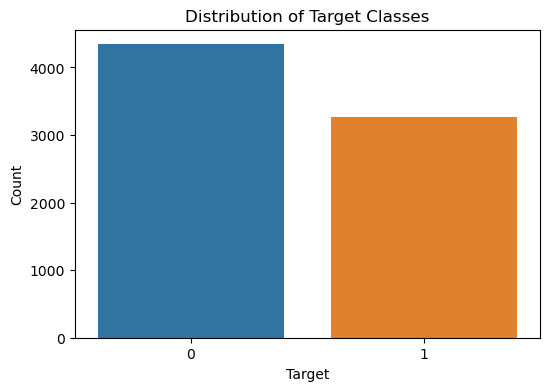

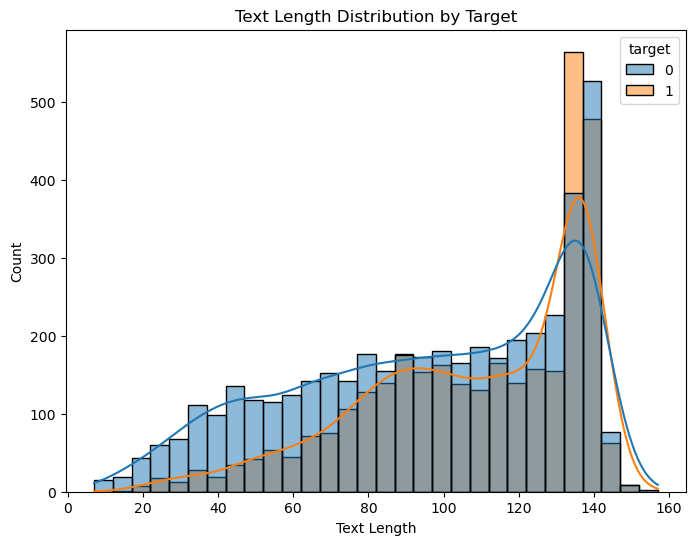

In [62]:
# Clean
# Check for missing values
print('Missing Values in Training Data:')
print(train.isnull().sum())
print('Missing Values in Testing Data:')
print(test.isnull().sum())

# Histogram: distribution target classes
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x=train['target'])
plt.title('Distribution of Target Classes')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Visualize text length: train
train['text_length'] = train['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=train, x='text_length', hue='target', bins=30, kde=True)
plt.title('Text Length Distribution by Target')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

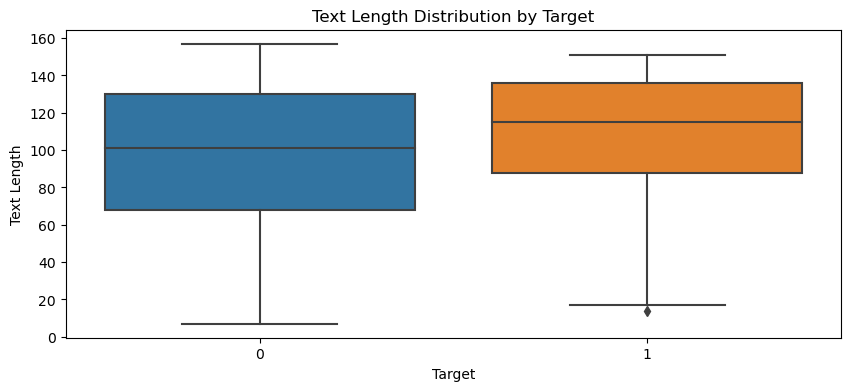

In [64]:
plt.figure(figsize=(10, 4))
plt.title('Comparison of text length in Tweets : real disaster(1) or not(0)', fontsize=12)
sns.boxplot(x='target', y='text_length', data=train)
plt.title('Text Length Distribution by Target')
plt.xlabel('Target')
plt.ylabel('Text Length')
plt.show()

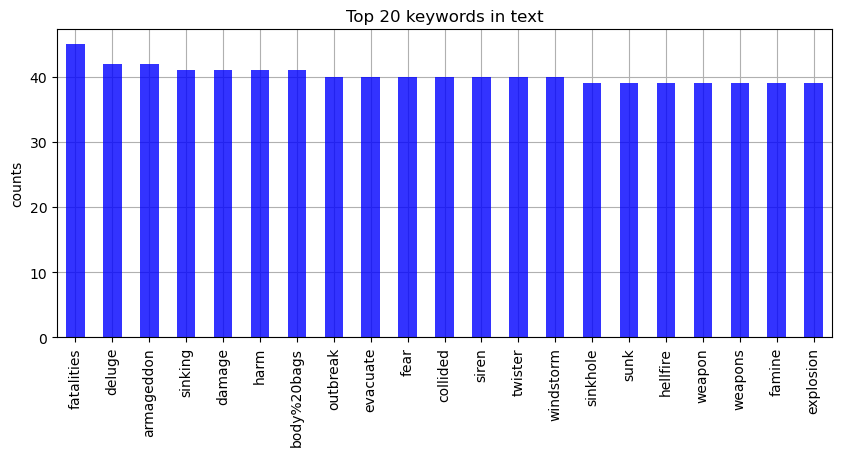

In [67]:
plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(10, 4))
train.keyword.value_counts()[0:21].plot(kind='bar', title='Top 20 keywords in text', color='b', alpha=0.8)
plt.ylabel('counts')
plt.grid(True)
plt.show()

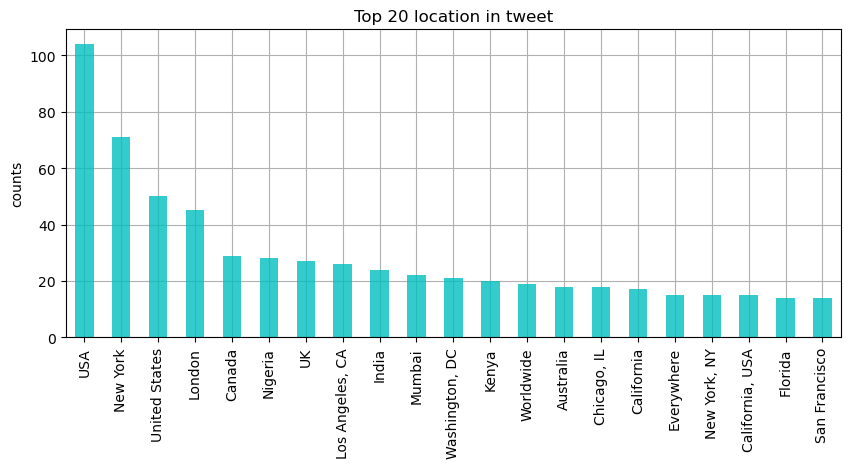

In [69]:
plt.figure(figsize=(10, 4))
train.location.value_counts()[0:21].plot(kind='bar', title='Top 20 location in tweet', color='c', alpha=0.8)
plt.ylabel('counts')
plt.grid(True)
plt.show()

In [70]:
# Remove unnecessary columns
train = train.drop(columns=['id', 'keyword', 'location'])

# Remove any rows with missing values

train = train.dropna()

# Summary Statistics
print('Summary Statistics of Text Length:')
print(train['text_length'].describe())

Summary Statistics of Text Length:
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64


## 4. Model Architecture<a class="anchor" id="section4"></a>

I have chosen the BERT (Bidirectional Encoder Representations from Transformers) word embedding methodology for this project. BERT stands out as an optimal choice for word embedding due to its capability to discern semantic nuances by considering contextual information. Essentially, it comprehends the context in which words are used. This language model, proficient in question-answering and language understanding, operates on numerical inputs, thus requiring tokenization of text data.

BERT operates bidirectionally, allowing the transformer encoder to process the entire sequence of words simultaneously rather than in a strict left-to-right or right-to-left manner. Though labeled as bidirectional, it operates in a non-directional manner, learning word context from the surrounding words. This capability proves crucial in interpreting tweets amidst evolving linguistic trends where phrases like "This outfit is fire" hold different meanings compared to mentions of actual fire incidents in neighborhoods.

The training of BERT involves two strategies: Masked Language Model (MLM) and Next Sentence Prediction (NSP). The MLM masks 15% of the words in a sequence, prompting the model to predict the masked words based on contextual cues. The NSP, on the other hand, involves pairing 50% of sentences with their original counterparts and the remaining with random sentences, training the model to distinguish contextually disconnected sentences.

The MLM architecture includes a classification layer atop the encoder output, transforming output vectors using an embedding matrix and calculating word probabilities with softmax. Meanwhile, the NSP architecture inserts tokens (CLS and SEP) to denote sentence beginnings and endings, adds sentence embeddings, and includes positional embeddings to denote each token's position in the sequence.

While the next sentence prediction may not always align seamlessly with tweet contexts due to space constraints and abbreviated forms, the robustness of BERT's architecture makes it an optimal choice for tweet characterization in this project.

In [35]:
#NLP technique language process architecture. BERT
#build and train neural network model

# Data Splitting
train_df, val_df = train_test_split(train, test_size=0.1, stratify=train['target'])

First, the data must be tokanized before feeding into BERT which converts to numerical and creates attention masks.

In [36]:
# BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

max_length = 160

# Tokenize the text
train_texts = list(train_df['text'])
train_inputs = tokenizer(train_texts, padding="max_length", truncation=True, max_length=max_length, return_tensors="pt")


val_texts = list(val_df['text'])
val_inputs = tokenizer(val_texts, padding="max_length", truncation=True, max_length=max_length, return_tensors="pt")

In [37]:
# Create Dataloader
batch_size = 16
train_labels = train_df['target'].values

val_labels = val_df['target'].values

train_dataset = TensorDataset(train_inputs.input_ids, train_inputs.attention_mask, torch.tensor(train_labels))
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)


val_dataset = TensorDataset(val_inputs.input_ids, val_inputs.attention_mask, torch.tensor(val_labels))
val_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)


train_dataset

In [38]:
# Initialize the model
model = BertForSequenceClassification.from_pretrained('bert-large-uncased', num_labels=2)

# Move the model to the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint a

Certain weights from the 'bert-large-uncased' model checkpoint were not utilized during the initialization of 'BertForSequenceClassification'. These weights include:
- 'cls.predictions.transform.dense.bias'
- 'cls.predictions.transform.dense.weight'
- 'cls.predictions.transform.LayerNorm.bias'
- 'cls.seq_relationship.bias'
- 'cls.seq_relationship.weight'
- 'cls.predictions.transform.LayerNorm.weight'
- 'cls.predictions.bias'

This occurrence is anticipated if you're initializing 'BertForSequenceClassification' from a checkpoint of a model trained for a different task or utilizing a distinct architecture (e.g., initializing a 'BertForSequenceClassification' model from a 'BertForPreTraining' model).

However, this situation is not expected if you're initializing 'BertForSequenceClassification' from a checkpoint of an identical model (i.e., initializing from a 'BertForSequenceClassification' model itself).

Additionally, certain weights ('classifier.bias' and 'classifier.weight') from 'BertForSequenceClassification' were not initialized using the 'bert-large-uncased' model checkpoint but have been newly initialized. To effectively use this model for predictions and inference, it is advisable to train it on a downstream task.

C:\Users\delru\anaconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Validation F1 Score: 0.7888198757763976
Validation Accuracy: 0.821522309711286
Validation F1 Score: 0.7968503937007874
Validation Accuracy: 0.8307086614173228
Validation F1 Score: 0.801980198019802
Validation Accuracy: 0.84251968503937
Validation F1 Score: 0.7907742998352554
Validation Accuracy: 0.8333333333333334


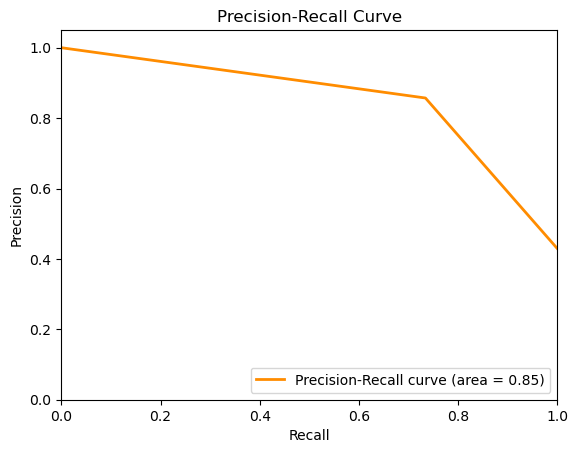

In [39]:
import torch
from sklearn.metrics import f1_score, accuracy_score
from transformers import AdamW
from sklearn.model_selection import ParameterGrid


def train_epoch(model, train_dataloader, optimizer, accum_steps):
    model.train()
    for step, batch in enumerate(train_dataloader):
        input_ids, attention_mask, train_labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        train_labels = train_labels.to(device)

        optimizer.zero_grad() if step % accum_steps == 0 else None
        output = model(input_ids, attention_mask=attention_mask, labels=train_labels)
        loss = output.loss
        loss.backward()

        if (step + 1) % accum_steps == 0:
            optimizer.step()

def validate(model, val_dataloader):
    model.eval()
    val_preds = []
    val_true = []
    for batch in val_dataloader:
        input_ids, attention_mask, val_labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        with torch.no_grad():
            output = model(input_ids, attention_mask=attention_mask)
            val_preds.extend(torch.argmax(output.logits, axis=1).tolist())
            val_true.extend(val_labels.tolist())

    val_f1 = f1_score(val_true, val_preds)
    val_acc = accuracy_score(val_true, val_preds)
    return val_f1, val_acc, val_true, val_preds

def main():
  
    optimizer = AdamW(model.parameters(), lr=1e-5, eps=1e-8)
    early_stopping_rounds = 2
    accum_steps = 4

    best_f1 = 0
    stopping_rounds = 0

    for epoch in range(accum_steps):
        train_epoch(model, train_dataloader, optimizer, accum_steps)
        val_f1, val_acc, val_true, val_preds = validate(model, val_dataloader)
        
        print(f"Validation F1 Score: {val_f1}")
        print(f"Validation Accuracy: {val_acc}")

        if val_f1 > best_f1:
            best_f1 = val_f1
            stopping_rounds = 0
        else:
            stopping_rounds += 1
            if stopping_rounds >= early_stopping_rounds:
                print("Early stopping triggered.")
                break
   
    precision, recall, _ = precision_recall_curve(val_true, val_preds)
    pr_auc = auc(recall, precision)

    # Plot Precision-Recall Curve
    plt.figure()
    plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")
    plt.show()
    
if __name__ == "__main__":
    main()

**Tuning hyper-parameter:**
1. First case
* Batch size: 32
* Learning rate : 2e-5 
* Number of Training Epochs (accum_steps): 4
* Bert-base-unencased

---

* Validation F1 Score: 0.7941653160453809
* Validation Accuracy: 0.8333333333333334
* Validation F1 Score: 0.8012718600953895
* Validation Accuracy: 0.8359580052493438
* Validation F1 Score: 0.7861635220125787
* Validation Accuracy: 0.821522309711286
* Validation F1 Score: 0.7877862595419847
* Validation Accuracy: 0.8175853018372703
* Precision recall area: 0.83

---

2. Second case
* Batch size: 32
* Learning rate : 1e-5 
* Number of Training Epochs (accum_steps): 4
* Bert-base-unencased

---

* Validation F1 Score: 0.7906976744186047
* Validation Accuracy: 0.8228346456692913
* Validation F1 Score: 0.7981366459627329
* Validation Accuracy: 0.8293963254593176
* Validation F1 Score: 0.7849293563579278
* Validation Accuracy: 0.8202099737532809
* Validation F1 Score: 0.7841409691629957
* Validation Accuracy: 0.8070866141732284
* Precision recall area: 0.82

---

3. Third case
* Batch size: 16
* Learning rate : 1e-5 
* Number of Training Epochs (accum_steps): 4
* Bert-base-unencased

---

* Validation F1 Score: 0.7899408284023669
* Validation Accuracy: 0.8136482939632546
* Validation F1 Score: 0.8006182380216383
* Validation Accuracy: 0.8307086614173228
* Validation F1 Score: 0.7926267281105991
* Validation Accuracy: 0.8228346456692913
* Validation F1 Score: 0.7935483870967741
* Validation Accuracy: 0.8320209973753281
* Precision recall area: 0.85

---

4. Fourth case
* Batch size: 64
* Learning rate : 1e-5 
* Number of Training Epochs (accum_steps): 4
* Bert-base-unencased

---

* Validation F1 Score: 0.7327044025157233
* Validation Accuracy: 0.7769028871391076
* Validation F1 Score: 0.7766116941529235
* Validation Accuracy: 0.8044619422572179
* Validation F1 Score: 0.8043818466353677
* Validation Accuracy: 0.8359580052493438
* Validation F1 Score: 0.789308176100629
* Validation Accuracy: 0.8241469816272966
* Precision recall area: 0.84

---

5. Fifth case
* Batch size: 16
* Learning rate : 1e-5 
* Number of Training Epochs (accum_steps): 6
* Bert-base-unencased

---

* Validation F1 Score: 0.7545076282940361
* Validation Accuracy: 0.7677165354330708
* Validation F1 Score: 0.799373040752351
* Validation Accuracy: 0.8320209973753281
* Validation F1 Score: 0.7926829268292682
* Validation Accuracy: 0.821522309711286
* Validation F1 Score: 0.7908396946564885
* Validation Accuracy: 0.8202099737532809
* Precision recall area: 0.84

---

6. Sixth case
* Batch size: 16
* Learning rate : 1e-5 
* Number of Training Epochs (accum_steps): 3
* Bert-base-unencased

---

* Validation F1 Score: 0.7921440261865794
* Validation Accuracy: 0.8333333333333334
* Validation F1 Score: 0.7833065810593902
* Validation Accuracy: 0.8228346456692913
* Validation F1 Score: 0.7789799072642968
* Validation Accuracy: 0.8123359580052494
* Precision recall area: 0.83

---

7. **Seventh and best case**
* Batch size: 16
* Learning rate : 1e-5 
* Number of Training Epochs (accum_steps):4
* Bert-large-unencased, better large-unencased

---

* Validation F1 Score: 0.7888198757763976
* Validation Accuracy: 0.821522309711286
* Validation F1 Score: 0.7968503937007874
* Validation Accuracy: 0.8307086614173228
* Validation F1 Score: 0.801980198019802
* Validation Accuracy: 0.84251968503937
* Validation F1 Score: 0.7907742998352554
* Validation Accuracy: 0.8333333333333334
* Precision recall area: 0.85

## 5. Results and Analysis<a class="anchor" id="section45"></a>

Hyperparameter Tuning Overview:

During the optimization process, several hyperparameters were fine-tuned to attain the most optimal model performance:

1. Learning Rate: The learning rate regulates the optimizer's step size during gradient descent, influencing the pace and convergence of the model. The best learning rate was determined as 1e-5.

2. Batch Size: Batch size determines the number of examples processed in each forward and backward pass. The most effective batch size identified was 16.

3. Number of Training Epochs: The ideal number of training epochs, set at 4, determined the frequency of iterations through the entire dataset during training.

4. Early Stopping Rounds: Early stopping was implemented to prevent overfitting by monitoring validation performance and terminating training when improvement ceased.

5. BERT Model Variant: Initially, the 'bert-base-uncased' model was utilized. However, performance metrics, such as accuracy and validation scores, notably improved upon using the 'bert-large-uncased' variant.

The analysis involved logging validation and accuracy scores for various hyperparameter configurations, showcasing the results iteratively to determine the optimal settings. This iterative process helped in assessing the impact of different parameter values on model performance.

Following the hyperparameter tuning process, a sample submission was evaluated, and a confusion matrix was plotted to assess the model's classification performance.

The recorded metrics and observations from these evaluations are detailed within the documentation, showcasing the influence of each hyperparameter variation on the model's predictive ability.

In [44]:
evaluate_text = list(test['text'])
evaluate_inputs = tokenizer(evaluate_text, padding="max_length", truncation=True, max_length=64, return_tensors="pt")
evaluate_inputs = {key: val.to(device) for key, val in evaluate_inputs.items()}  # Send the inputs to the same device as model

predictions = []
# model.eval()

# Adjusting the DataLoader to use evaluate_inputs instead of train_inputs
for input_ids, attention_mask in DataLoader(TensorDataset(evaluate_inputs['input_ids'], evaluate_inputs['attention_mask']), batch_size=batch_size):
    with torch.no_grad():
        # Send the input tensors to the same device as model
        input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)
        output = model(input_ids, attention_mask=attention_mask)
        predictions.extend(torch.argmax(output.logits, axis = 1).tolist())

In [45]:
# Evaluate the model on the validation set
model.eval()
all_val_preds = []

for batch in val_dataloader:
    batch = [item.to(device) for item in batch]  # Move data to device
    input_ids, attention_mask, val_batch_labels = batch
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        val_preds = torch.argmax(outputs.logits, dim=1)
        all_val_preds.extend(val_preds.cpu().numpy())

print(len(val_labels))  # Length of val_labels
print(len(all_val_preds))  # Length of all_val_preds

762
762


In [46]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(val_labels, all_val_preds)

# Print or visualize the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[395  40]
 [ 87 240]]


In [47]:
test["target"] = predictions
submission = test[["id", "target"]]

sample_submission = pd.read_csv(csv_path / "sample_submission.csv")
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [48]:
sample_submission.describe()

,id,target
count,3263.000000,3263.0
mean,5427.152927,0.0
std,3146.427221,0.0
min,0.000000,0.0
25%,2683.000000,0.0
50%,5500.000000,0.0
75%,8176.000000,0.0
max,10875.000000,0.0


In [49]:
sample_submission.to_csv("submission.csv", index=False)

## 6. Conclusion<a class="anchor" id="section45"></a>
 
In summary, the best-performing model in this analysis was configured with a batch size of 16, a learning rate set at 1e-5, trained over 4 epochs, and employed the 'bert-large-uncased' variant. Despite a slightly slower execution time, this model showcased superior performance in terms of F1 score, validation accuracy, and precision-recall metrics.

Validation Metrics:
- Validation F1 Score: 0.7888198757763976
- Validation Accuracy: 0.821522309711286
- Validation F1 Score: 0.7968503937007874
- Validation Accuracy: 0.8307086614173228
- Validation F1 Score: 0.801980198019802
- Validation Accuracy: 0.84251968503937
- Validation F1 Score: 0.7907742998352554
- Validation Accuracy: 0.8333333333333334
- Precision-Recall Area: 0.85

Utilizing BERT word embedding proved to be advantageous for this project, given its ability to capture nuances in word context and semantics, thus accounting for contextual variations. Future investigations could involve experimenting with different word embedding models to compare their performance. Additionally, incorporating improved visualization methods, such as converting tokenized tweets back into text to display some classified examples, could aid in affirming the disaster categorization.

With a peak accuracy of 0.838 and an F1 score of 0.80, this trained model demonstrated a commendable capability in classifying disaster-related text.

References:
https://towardsdatascience.com/bert-why-its-been-revolutionizing-nlp-5d1bcae76a13

https://arxiv.org/pdf/1810.04805.pdf

https://www.kaggle.com/code/sarashahin/bertnaturallanguageprocessing-with-disastertweets
https://www.kaggle.com/code/unstoppablesk/tweetsdisaster

https://www.kaggle.com/code/billycemerson/nlp-text-classification-svm